# Hospitality revenue Analysis

## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the datasets

In [2]:
dim_date=pd.read_csv(r'C:\Users\sanju\Downloads\input-files-1 (1)\Input Files\dim_date.csv')
dim_hotels=pd.read_csv(r'C:\Users\sanju\Downloads\input-files-1 (1)\Input Files\dim_hotels.csv')
dim_rooms=pd.read_csv(r'C:\Users\sanju\Downloads\input-files-1 (1)\Input Files\dim_rooms.csv')
fact_aggregate=pd.read_csv(r'C:\Users\sanju\Downloads\input-files-1 (1)\Input Files\fact_aggregated_bookings.csv')
fact_bookings=pd.read_csv(r'C:\Users\sanju\Downloads\input-files-1 (1)\Input Files\fact_bookings.csv')

## Data Exploration 

Column Description for dim_date:

1. date: This column represents the dates present in May, June and July.

2. mmm yy: This column represents the date in the format of mmm yy (monthname year).

3. week no: This column represents the unique week number for that particular date.

4. day_type: This column represents whether the given day is Weekend or Weekeday.

In [3]:
dim_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


Column Description for dim_hotels:

1. property_id: This column represents the Unique ID for each of the hotels.

2. property_name: This column represents the name of each hotel.

3. category: This column determines which class[Luxury, Business] a particular hotel/property belongs to. 

4. city: This column represents where the particular hotel/property resides in.

In [4]:
dim_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


Column Description for dim_rooms:

1. room_id: This column represents the type of room[RT1, RT2, RT3, RT4] in a hotel.

2. room_class: This column represents to which class[Standard, Elite, Premium, Presidential] particular room type belongs.


In [5]:
dim_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


Column Description for fact_aggregated_bookings:

1. property_id: This column represents the Unique ID for each of the hotels.

2. check_in_date: This column represents all the check_in_dates of the customers.

3. room_category: This column represents the type of room[RT1, RT2, RT3, RT4] in a hotel.

4. successful_bookings: This column represents all the successful room bookings that happen for a particular room type in that 
hotel on that particular date.

5. capacity: This column represents the maximum count of rooms available for a particular room type in that hotel on that
particular date.


In [6]:
fact_aggregate.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


Column Description for fact_bookings:

1. booking_id: This column represents the Unique Booking ID for each customer when they booked their rooms.

2. property_id: This column represents the Unique ID for each of the hotels

3. booking_date: This column represents the date on which the customer booked their rooms.

4. check_in_date: This column represents the date on which the customer check-in(entered) at the hotel.

5. check_out_date: This column represents the date on which the customer check-out(left) of the hotel.

6. no_guests: This column represents the number of guests who stayed in a particular room in that hotel.

7. room_category: This column represents the type of room[RT1, RT2, RT3, RT4] in a hotel.

8. booking_platform: This column represents in which way the customer booked his room.

9. ratings_given: This column represents the ratings given by the customer for hotel services.

10. booking_status: This column represents whether the customer cancelled his booking[Cancelled], successfully stayed in the 
hotel[Checked Out] or booked his room but not stayed in the hotel[No show].

11. revenue_generated: This column represents the amount of money generated by the hotel from a particular customer.

12. revenue_realized: This column represents the final amount of money that goes to the hotel based on booking status. If the 
booking status is cancelled, then 40% of the revenue generated is deducted and the remaining is refunded to the customer. If the booking status is Checked Out/No show, then full revenue generated will goes to hotels.



In [7]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [8]:
dim_date.shape

(92, 4)

In [9]:
dim_hotels.shape

(25, 4)

In [10]:
dim_rooms.shape

(4, 2)

In [11]:
fact_aggregate.shape

(9200, 5)

In [12]:
fact_bookings.shape

(134590, 12)

In [13]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [14]:
dim_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [15]:
dim_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [16]:


fact_aggregate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [17]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [18]:
fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


## Data Cleaning

In [19]:
fact_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [20]:
fact_bookings['ratings_given'] = fact_bookings['ratings_given'].fillna(0)

In [21]:
fact_bookings.isnull().sum()

booking_id           0
property_id          0
booking_date         0
check_in_date        0
checkout_date        0
no_guests            0
room_category        0
booking_platform     0
ratings_given        0
booking_status       0
revenue_generated    0
revenue_realized     0
dtype: int64

In [22]:
dim_date['date'] = pd.to_datetime(dim_date['date'])
fact_aggregate['check_in_date']=pd.to_datetime(fact_aggregate['check_in_date'])
fact_bookings['booking_date']=pd.to_datetime(fact_bookings['booking_date'])
fact_bookings['check_in_date']=pd.to_datetime(fact_bookings['check_in_date'])
fact_bookings['checkout_date']=pd.to_datetime(fact_bookings['checkout_date'])

In [23]:
dim_date.dtypes

date        datetime64[ns]
mmm yy              object
week no             object
day_type            object
dtype: object

In [24]:
fact_aggregate.dtypes

property_id                     int64
check_in_date          datetime64[ns]
room_category                  object
successful_bookings             int64
capacity                        int64
dtype: object

In [25]:
fact_bookings.dtypes

booking_id                   object
property_id                   int64
booking_date         datetime64[ns]
check_in_date        datetime64[ns]
checkout_date        datetime64[ns]
no_guests                     int64
room_category                object
booking_platform             object
ratings_given               float64
booking_status               object
revenue_generated             int64
revenue_realized              int64
dtype: object

## Revenue Analysis 

In [26]:
revenue_df= pd.merge(dim_hotels,fact_bookings,how='left',on='property_id')
revenue_df

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT11,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT13,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,16558,Atliq Grands,Luxury,Delhi,May012216558RT14,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640
4,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT46,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT47,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT48,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,0.0,Cancelled,32300,12920
134588,17564,Atliq Seasons,Business,Mumbai,Jul312217564RT49,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


Hotelwise revenue

In [27]:
hotels_revenue = revenue_df.groupby(['property_name','city']).agg({'revenue_realized': 'sum'}).rename(columns={'revenue_realized':'Revenue_in_millions'})
hotels_revenue.reset_index(inplace=True)
hotels_revenue['Revenue_in_millions']= hotels_revenue['Revenue_in_millions']/1000000
hotels_revenue['Revenue_in_millions']=hotels_revenue['Revenue_in_millions'].round(2)
hotels_revenue

,property_name,city,Revenue_in_millions
0,Atliq Bay,Bangalore,82.44
1,Atliq Bay,Delhi,56.44
2,Atliq Bay,Hyderabad,69.26
3,Atliq Bay,Mumbai,51.91
4,Atliq Blu,Bangalore,72.96
5,Atliq Blu,Delhi,57.93
6,Atliq Blu,Hyderabad,56.04
7,Atliq Blu,Mumbai,73.92
8,Atliq City,Bangalore,81.88
9,Atliq City,Delhi,54.93


In [28]:
revenue_pivot = hotels_revenue.pivot(index='city', columns='property_name',values='Revenue_in_millions')
revenue_pivot

property_name,Atliq Bay,Atliq Blu,Atliq City,Atliq Exotica,Atliq Grands,Atliq Palace,Atliq Seasons
city,,,,,,,
Bangalore,82.44,72.96,81.88,60.02,54.49,68.60,NaN
Delhi,56.44,57.93,54.93,NaN,36.06,89.14,NaN
Hyderabad,69.26,56.04,61.01,47.84,46.25,44.84,NaN
Mumbai,51.91,73.92,88.00,212.44,74.73,101.51,66.13


Text(0.5, 1.0, 'City & Hotel Wise Revenue')

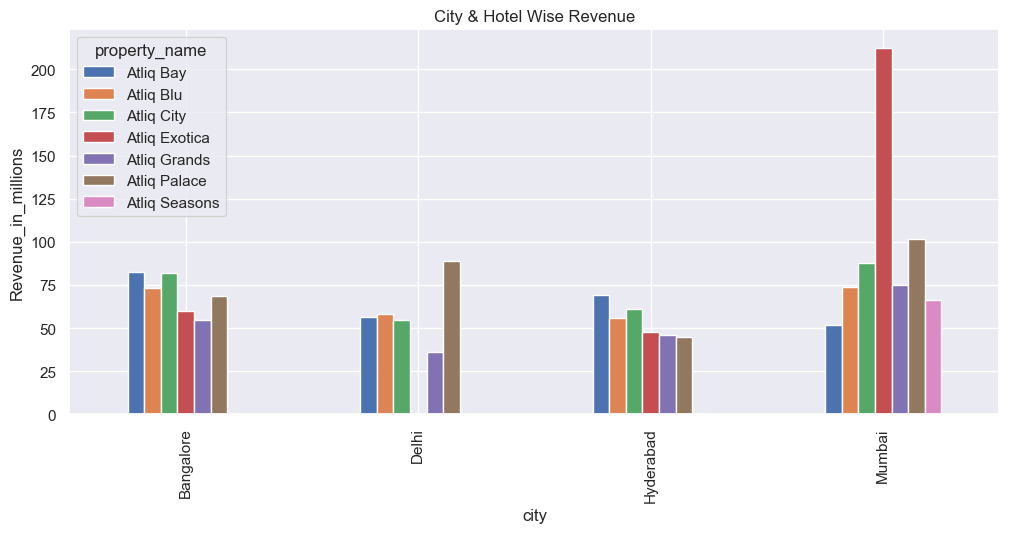

In [29]:
sns.set(rc={'figure.figsize':(12,5)})
revenue_pivot.plot(kind='bar')

plt.ylabel('Revenue_in_millions')
plt.title('City & Hotel Wise Revenue')

Insight: In terms of revenue we camn say that,

-In mumbai, Atiq exotica is the best performer and atliq palace is the worst performer.

-In hyderabad, Aliq bay is the best performer and atliq palace is the worst performer.

-In Delhi, Aliq palace is the best performer and atliq grands is the worst performer.

-In Bangalore, Aliq bay is the best performer and atliq grands is the worst performer.


In [30]:
# Citywise Revenue In Millions
city_revenue=revenue_df.groupby(['city']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'Revenue in Millions'})
city_revenue['Revenue in Millions']=city_revenue['Revenue in Millions']/1000000
city_revenue['Revenue in Millions']=city_revenue['Revenue in Millions'].round(2)
city_revenue.sort_values(by='Revenue in Millions',ascending=False)

,Revenue in Millions
city,
Mumbai,668.64
Bangalore,420.40
Hyderabad,325.23
Delhi,294.50


Text(0.5, 1.0, 'City Wise Revenue')

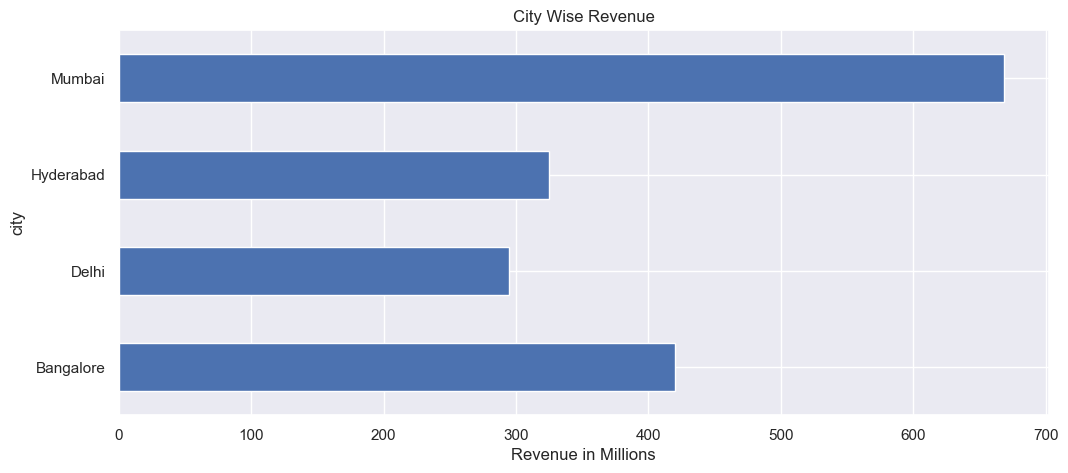

In [31]:
ax=city_revenue.plot(kind='barh',legend=False)
plt.xlabel('Revenue in Millions')
plt.title('City Wise Revenue')

Insights: In terms of revenue, Hotels of Mumbai has made the highest revenue , whereas hotels of delhi has made the lowest revenue.

In [32]:
revenue_tr=pd.merge(dim_date,revenue_df,how='left',left_on='date',right_on='check_in_date')
revenue_trend=revenue_tr.groupby(['week no','property_name']).agg({'revenue_realized':'sum'}).rename(columns={'revenue_realized':'Revenue in Millions'})
revenue_trend['Revenue in Millions']=revenue_trend['Revenue in Millions']/1000000
revenue_trend['Revenue in Millions']=revenue_trend['Revenue in Millions'].round(2)
revenue_trend.reset_index(inplace=True)
revenue_trend

,week no,property_name,Revenue in Millions
0,W 19,Atliq Bay,20.87
1,W 19,Atliq Blu,20.98
2,W 19,Atliq City,23.32
3,W 19,Atliq Exotica,25.74
4,W 19,Atliq Grands,17.55
...,...,...,...
93,W 32,Atliq City,3.66
94,W 32,Atliq Exotica,3.85
95,W 32,Atliq Grands,2.63
96,W 32,Atliq Palace,3.79


Text(0.5, 1.0, 'Weekly Revenue Trend')

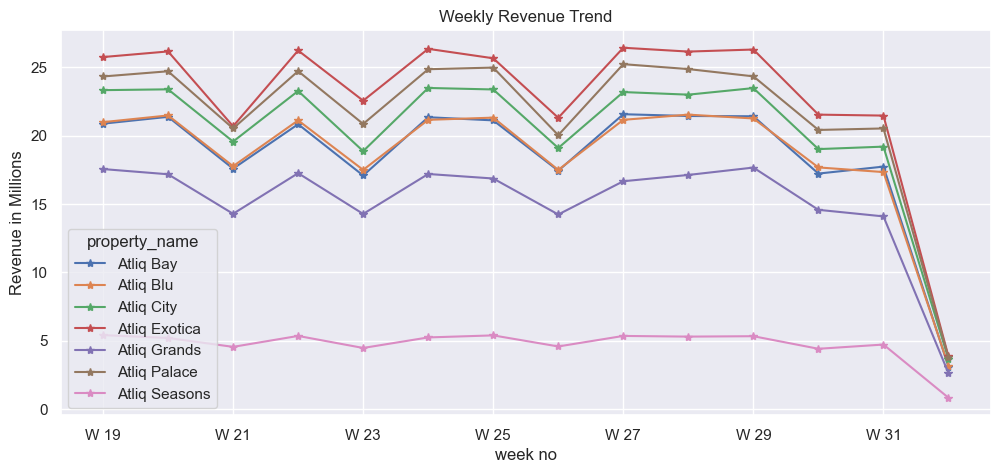

In [33]:
# Weekly Hotelwise Revenue Trend
pivot_data=revenue_trend.pivot(index='week no',columns='property_name',values='Revenue in Millions')
pivot_data.plot(kind='line',marker='*')
plt.ylabel('Revenue in Millions')
plt.title('Weekly Revenue Trend')

 Booking Analysis 

In [34]:
bookings= revenue_df.groupby(['property_name','city']).agg({'booking_id': 'nunique'}).rename(columns={'booking_id':'Total_booking_count'})
bookings.reset_index(inplace=True)
bookings

,property_name,city,Total_booking_count
0,Atliq Bay,Bangalore,5812
1,Atliq Bay,Delhi,4820
2,Atliq Bay,Hyderabad,7333
3,Atliq Bay,Mumbai,3424
4,Atliq Blu,Bangalore,5736
5,Atliq Blu,Delhi,4418
6,Atliq Blu,Hyderabad,6458
7,Atliq Blu,Mumbai,5183
8,Atliq City,Bangalore,5979
9,Atliq City,Delhi,4693


Text(0.5, 1.0, 'Hotel & City wise Bookings')

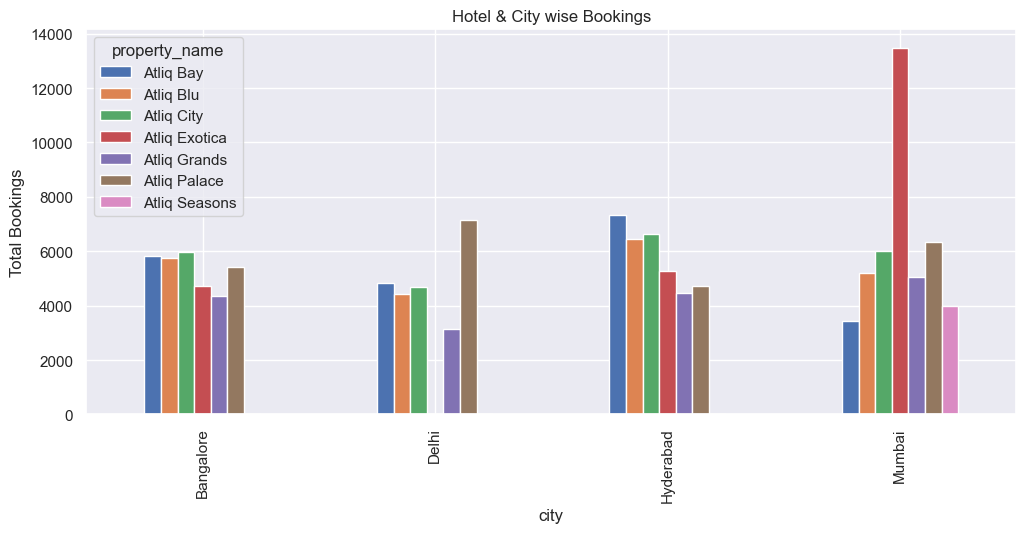

In [35]:
booking_pivot = bookings.pivot(index='city', columns='property_name',values='Total_booking_count')

booking_pivot.plot(kind='bar')
plt.ylabel('Total Bookings')
plt.title('Hotel & City wise Bookings')

Insight: In terms of bookings we can say that,

-In mumbai, Atiq exotica has the highest number of bookings and atliq bay has the lowest number of bookings

-In hyderabad, Aliq bay has the highest number of bookings and atliq grands has the highest number of bookings

-In Delhi, Aliq palace has the highest number of bookings and atliq grands has the highest number of bookings

-In Bangalore, Aliq city has the highest number of bookings and atliq grands has the highest number of bookings

In [36]:
platform_bookings= revenue_df.groupby(['booking_platform']).agg({'booking_id': 'nunique'}).rename(columns={'booking_id':'Total_booking_count'})
platform_bookings.sort_values(by='Total_booking_count',ascending=False)

,Total_booking_count
booking_platform,
others,55066
makeyourtrip,26898
logtrip,14756
direct online,13379
tripster,9630
journey,8106
direct offline,6755


<Axes: ylabel='booking_platform'>

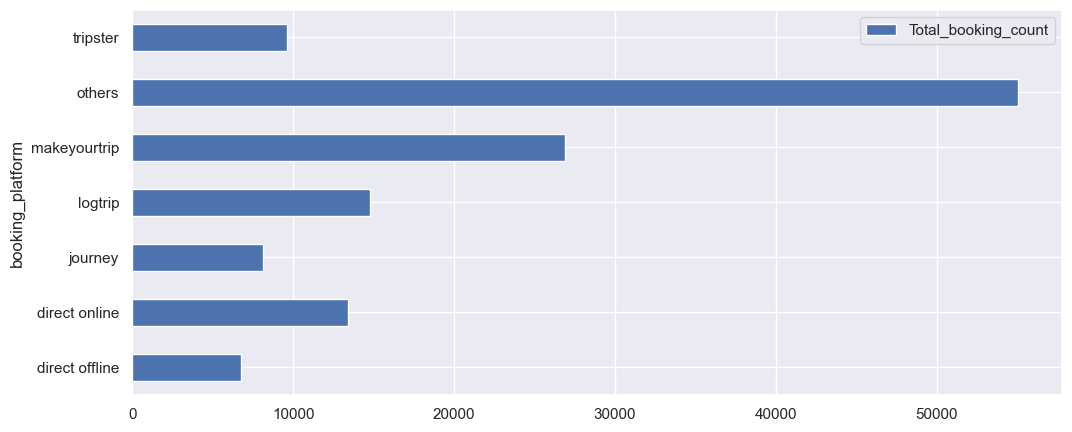

In [37]:
platform_bookings.plot(kind='barh')

Insight: Highest number of bookings came from other platforms and lowest number of bookings came from direct offline.

In [38]:
rooms_revenue= pd.merge(dim_rooms,fact_bookings,how='left',left_on='room_id', right_on= 'room_category')
rooms_revenue.head()

,room_id,room_class,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,RT1,Standard,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,RT1,Standard,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640
2,RT1,Standard,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,RT1,Standard,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640
4,RT1,Standard,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [39]:
room= rooms_revenue.groupby('room_class').agg({'booking_id':'nunique'})
room['percentage']= room['booking_id']*100/room['booking_id'].sum()
room['percentage']= room['percentage'].round(2)
room

,booking_id,percentage
room_class,,
Elite,49505,36.78
Premium,30566,22.71
Presidential,16073,11.94
Standard,38446,28.57


array([<Axes: ylabel='percentage'>], dtype=object)

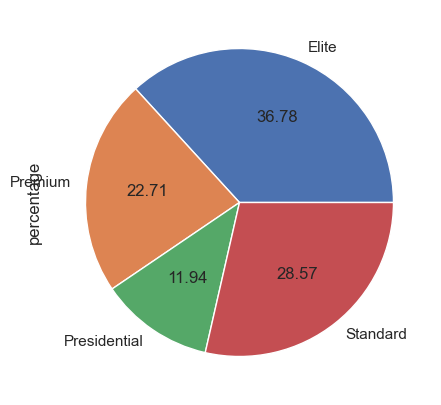

In [40]:
room['percentage'].plot(kind='pie',subplots=True,autopct='%0.2f')

In [41]:
weekly_bookings=revenue_tr.groupby(['week no','property_name']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Total Bookings'})
weekly_bookings.reset_index(inplace=True)
weekly_bookings_pivot=weekly_bookings.pivot(index='week no',columns='property_name',values='Total Bookings')
weekly_bookings_pivot

property_name,Atliq Bay,Atliq Blu,Atliq City,Atliq Exotica,Atliq Grands,Atliq Palace,Atliq Seasons
week no,,,,,,,
W 19,1745,1771,1897,1907,1411,1913,321
W 20,1746,1789,1906,1906,1384,1908,319
W 21,1441,1465,1586,1546,1134,1600,270
W 22,1726,1754,1896,1913,1389,1933,323
W 23,1421,1475,1559,1624,1149,1591,270
W 24,1756,1784,1916,1937,1394,1929,325
W 25,1734,1779,1897,1895,1381,1930,327
W 26,1424,1459,1568,1574,1141,1581,270
W 27,1758,1777,1883,1911,1379,1933,321


Text(0.5, 1.0, 'Weekly Hotel Bookings')

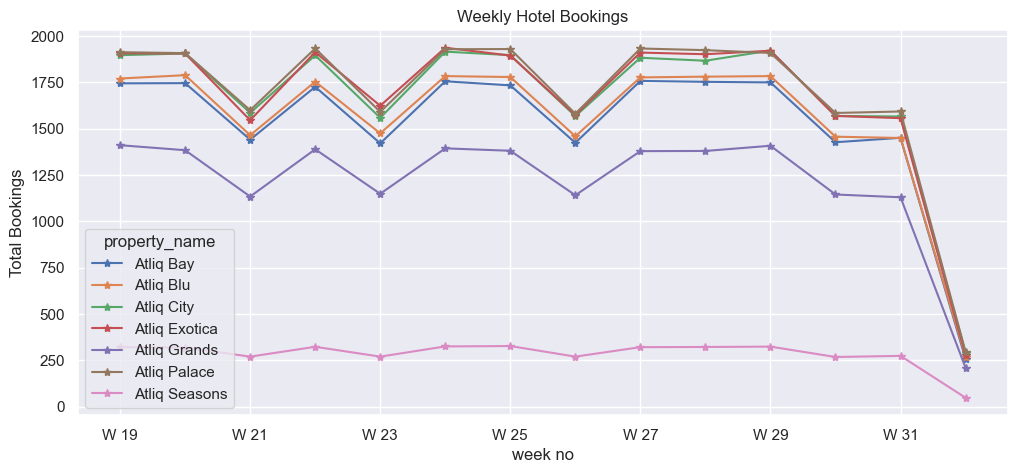

In [42]:
weekly_bookings_pivot.plot(kind='line',marker='*')
plt.ylabel('Total Bookings')
plt.title('Weekly Hotel Bookings')

Cancellation percentage

In [43]:
# Hotelwise cancellation percentage, No Show Percentage, Check out percentage
df1=revenue_df.groupby(['property_name','booking_status']).agg({'booking_id':'nunique'}).reset_index().pivot(index='property_name',columns='booking_status',values='booking_id')
df2=revenue_df.groupby(['property_name']).agg({'booking_id':'nunique'}).rename(columns={'booking_id':'Toatal Bookings'})
df3=pd.merge(df1,df2,how='inner',on='property_name')
df3

,Cancelled,Checked Out,No Show,Toatal Bookings
property_name,,,,
Atliq Bay,5314,14965,1110,21389
Atliq Blu,5373,15267,1155,21795
Atliq City,5811,16365,1147,23323
Atliq Exotica,5713,16557,1171,23441
Atliq Grands,4273,11914,848,17035
Atliq Palace,5949,16532,1144,23625
Atliq Seasons,987,2811,184,3982


In [44]:
df3['Cancellation Percentage']=df3['Cancelled']*100/df3['Toatal Bookings']
df3['Checked Out Percentage']=df3['Checked Out']*100/df3['Toatal Bookings']
df3['No Show Percentage']=df3['No Show']*100/df3['Toatal Bookings']
df4=df3[['Checked Out Percentage','Cancellation Percentage','No Show Percentage']]
df4

,Checked Out Percentage,Cancellation Percentage,No Show Percentage
property_name,,,
Atliq Bay,69.965870,24.844546,5.189583
Atliq Blu,70.048176,24.652443,5.299381
Atliq City,70.166788,24.915320,4.917892
Atliq Exotica,70.632652,24.371827,4.995521
Atliq Grands,69.938362,25.083651,4.977986
Atliq Palace,69.976720,25.180952,4.842328
Atliq Seasons,70.592667,24.786539,4.620794


Text(0.5, 1.0, 'Hotel wise Check out, Cancellation, No Show Percentage')

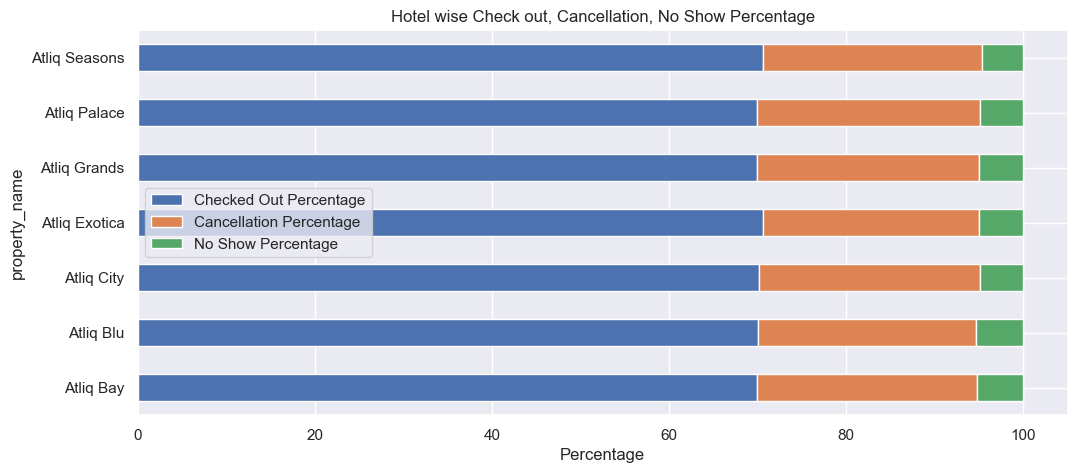

In [45]:
df4.plot(kind='barh',stacked=True)
plt.xlabel('Percentage')
plt.title('Hotel wise Check out, Cancellation, No Show Percentage')

Average daily rate (ADR) Analysis

In [46]:
adr= revenue_df.groupby(['property_name']).agg({'booking_id':'nunique','revenue_realized': 'sum'})


In [47]:
adr['ADR']= adr['revenue_realized']/adr['booking_id']
adr['ADR']=adr['ADR'].round(0)
adr.sort_values(by='ADR')
adr

,booking_id,revenue_realized,ADR
property_name,,,
Atliq Bay,21389,260051178,12158.0
Atliq Blu,21795,260855522,11969.0
Atliq City,23323,285811939,12255.0
Atliq Exotica,23441,320312468,13665.0
Atliq Grands,17035,211532764,12418.0
Atliq Palace,23625,304081863,12871.0
Atliq Seasons,3982,66125495,16606.0


<Axes: ylabel='property_name'>

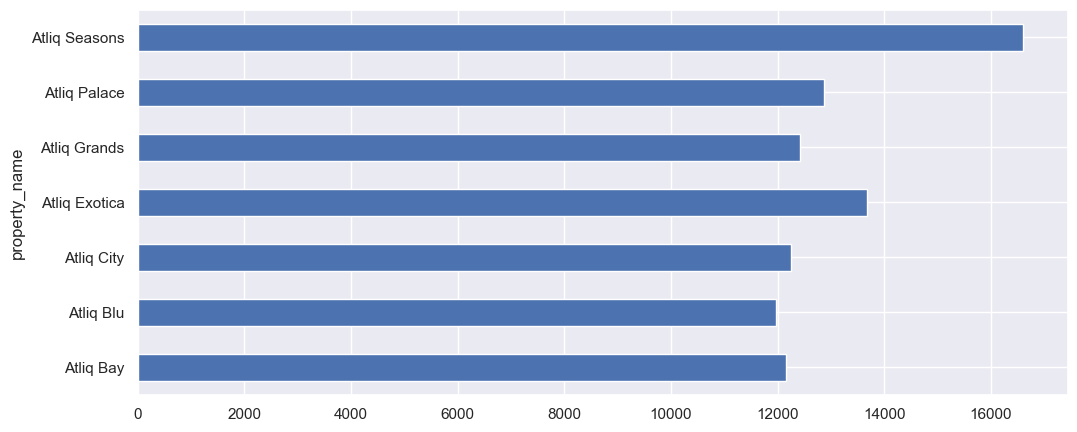

In [48]:
adr['ADR'].plot(kind='barh')